<a href="https://colab.research.google.com/github/gothwalritu/Outreachy_Ritu_Gothwal_2023/blob/main/Task_1_contribution_phase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 1: Moja-Global/Outreachy December 2023 Contribution Phase**


## **TASK:1   DATA ANALYSIS OF Himalayan States of India**


In this task  analysis of data from moja global datasets was performed.


*   The indo-himalayan region include the following states of India:
###Jammu & Kashmir, Himachal Pradesh, Uttarakhand, Sikkim, Arunachal Pradesh, Assam , Nagaland, Manipur, Mizoram, Tripura, Meghalaya, West Bengal (partially, especially the areas of Darjeeling and Kalimpong)


*   The Indo-Himalayan region, stretching across the northern boundary of the Indian subcontinent, encompasses a diverse array of ecosystems, from tropical rainforests in the foothills to alpine meadows at higher altitudes. This region is one of the biodiversity hotspots in the world, and its unique geographical location and varied climatic conditions make it a reservoir of rich biodiversity.















In [ ]:
# install and import condalab, run twice.
!pip install -q condacolab -q

In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


# Initialize **libraries**

In [1]:

# Import all necessary libraries
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline



In [31]:
# Mounting the google drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.  Functions defined and used

In [32]:
def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)

def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)

#2. administrative boundaries

In [4]:
# Loading the administraive boundaries of India
ind_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level2 by Country/IND/IND_AL2_India.json")

# Read geojson file into a geodataframe
ind_df = gpd.read_file(ind_df)
ind_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,,India,India,India,,administrative,2,Q668,hi:भारत,2019-10-02 22:56:03,"MULTIPOLYGON (((93.78876 6.90034, 93.78876 6.9..."


In [5]:
# Checking the data frame size and shape
ind_df.shape

(1, 12)

In [ ]:
# Loading the administraive boundaries of Indian states
ind_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_ALL_states.json")
# Read geojson file into a geodataframe
ind_state_df = gpd.read_file(ind_state_df)
ind_state_df

In [7]:
# Loading the administraive boundaries of  Himachal Pradesh state
hima_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Himachal Pradesh.json")
# Read geojson file into a geodataframe
hima_state_df = gpd.read_file(hima_state_df)
hima_state_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-AR,Arunachal Pradesh,Arunachal Pradesh,Arunachal Pradesh,,administrative,4,Q1162,en:Arunachal Pradesh,2019-09-28 22:16:02,"POLYGON ((91.56231 27.63221, 91.56233 27.63145..."


In [8]:
# Loading the administraive boundaries of  Arunachal Pradesh state
aruna_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Arunachal Pradesh.json")
# Read geojson file into a geodataframe
aruna_state_df = gpd.read_file(aruna_state_df)
aruna_state_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-HP,Himachal Pradesh,Himachal Pradesh,Himachal Pradesh,,administrative,4,Q1177,en:Himachal Pradesh,2019-09-28 22:16:02,"POLYGON ((75.58615 32.08110, 75.59401 32.07734..."


In [9]:
# Loading the administraive boundaries of  Arunachal Pradesh state
JK_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Jammu and Kashmir.json")
# Read geojson file into a geodataframe
JK_df = gpd.read_file(JK_df)
JK_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-JK,Jammu and Kashmir,Jammu and Kashmir,Jammu and Kashmir,,administrative,4,Q1180,en:Jammu and Kashmir,2019-09-28 22:16:02,"POLYGON ((73.75003 34.34408, 73.75035 34.34397..."


In [10]:
# Loading the administraive boundaries of  Uttarakhand state
uttra_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Uttarakhand.json")
# Read geojson file into a geodataframe
uttra_df = gpd.read_file(uttra_df)
uttra_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,,Uttarakhand,,Uttarakhand,,administrative,4,,,2019-09-28 22:16:02,"POLYGON ((77.57133 30.40925, 77.57532 30.39771..."


In [11]:
# Loading the administraive boundaries of Sikkim state
sikki_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Sikkim.json")
# Read geojson file into a geodataframe
sikki_df = gpd.read_file(sikki_df)
sikki_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-SK,Sikkim,Sikkim,Sikkim,State of Sikkim,administrative,4,Q1505,en:Sikkim,2019-09-28 22:16:02,"POLYGON ((88.01203 27.21621, 88.01204 27.21595..."


In [12]:
# Loading the administraive boundaries of Assam state
assam_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Assam.json")
# Read geojson file into a geodataframe
assam_df = gpd.read_file(assam_df)
assam_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-AS,Assam,Assam,Assam,,administrative,4,Q1164,en:Assam,2019-09-28 22:16:02,"POLYGON ((95.94798 27.93723, 95.94870 27.93796..."


In [13]:
# Loading the administraive boundaries of Uttar Pradesh state
UP_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Uttar Pradesh.json")
# Read geojson file into a geodataframe
UP_df = gpd.read_file(UP_df)
UP_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-UP,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,,administrative,4,Q1498,en:Uttar Pradesh,2019-09-28 22:16:02,"POLYGON ((77.08388 29.58740, 77.08467 29.58439..."


In [14]:
# Loading the administraive boundaries of Bihar state
bihar_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Bihar.json")
# Read geojson file into a geodataframe
bihar_df = gpd.read_file(bihar_df)
bihar_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-BR,Bihar,Bihar,Bihar,,administrative,4,Q1165,en:Bihar,2019-10-01 22:00:02,"POLYGON ((83.32126 25.02036, 83.32147 25.01803..."


In [15]:
# Loading the administraive boundaries of West Bengal state
west_beng_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_West Bengal.json")
# Read geojson file into a geodatafram
west_beng_df = gpd.read_file(west_beng_df)
west_beng_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-WB,West Bengal,West Bengal,West Bengal,,administrative,4,Q1356,en:West Bengal,2019-10-04 22:35:01,"MULTIPOLYGON (((88.06765 27.19043, 88.07479 27..."


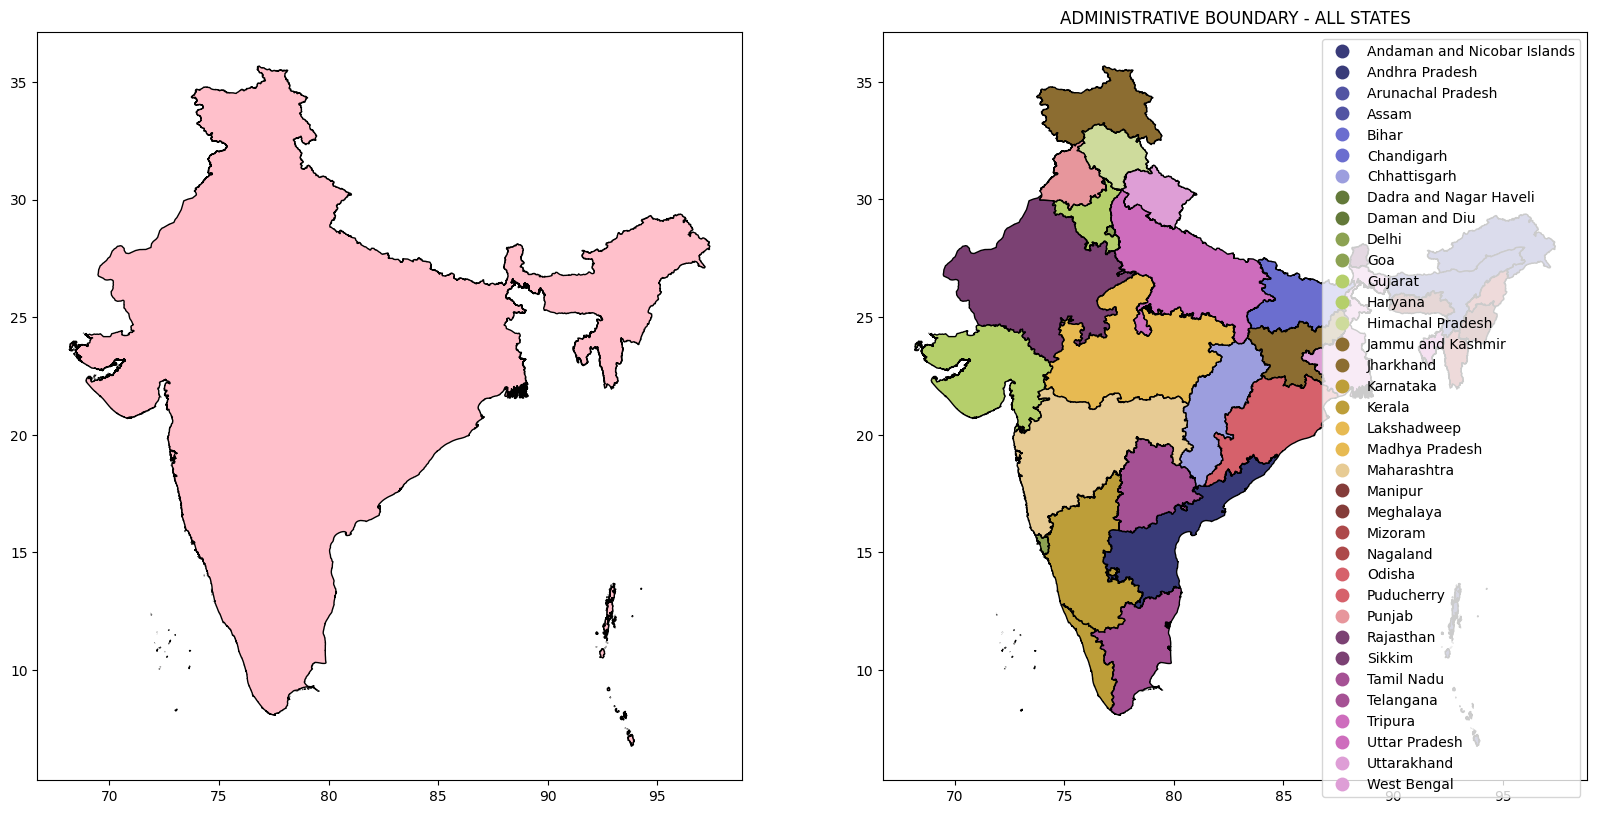

In [16]:

# Creating adminitrative plot of India
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

ind_df.plot(ax=ax1, color="pink", edgecolor="black")
ax2.set_title("ADMINISTRATIVE BOUNDARY ")

ind_state_df.plot(ax=ax2, edgecolor="black",column='name', cmap = 'tab20b', legend=True)
ax2.set_title("ADMINISTRATIVE BOUNDARY - ALL STATES")
plt.axis('on')


plt.show()



### The focus for this analysis would be on Himalayan region of India which are the Nothern and North-eastern states of India and are called here as Himalayan States.

In [17]:
# Creating a single df for all the himalayan states
state_dfs = [hima_state_df, aruna_state_df, JK_df,uttra_df,sikki_df,assam_df,UP_df, bihar_df, west_beng_df]

In [18]:
# Joined the df
all_states_df = pd.concat(state_dfs)

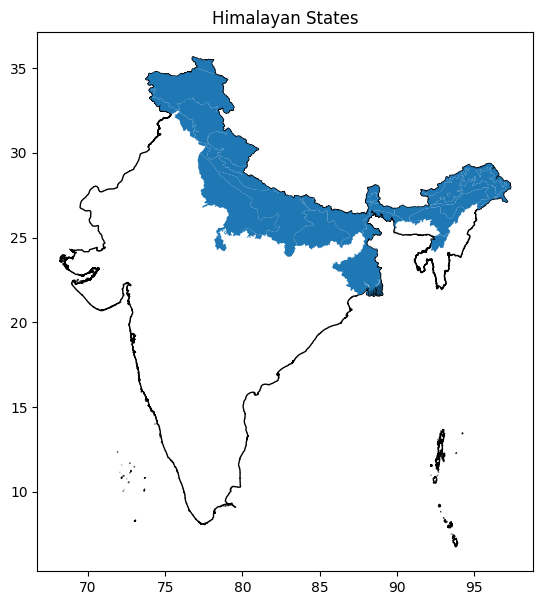

In [104]:
# Creating plot of administrative boundaries of Himalayan states
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.set_title('Himalayan States')
plot_boundary(ind_df, ax)
for state_df in state_dfs:
    state_name = state_df['name'].iloc[0]
    state_df.plot(ax=ax, label=state_name)

plt.show()

#3. BIODIVERSIY HOTSPOTS

In [ ]:
## Loading the global biodiversity hotspots data
bio_hotspot = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/CI_BiodiversityHotspots.geojson")
# Read geojson file into a geodataframe

# Read geojson file into a geodataframe
bio_hotspot_df = gpd.read_file(bio_hotspot)
bio_hotspot_df

In [143]:
print("India has the following Biodiversity Hotspots: ")
print(ind_bio_df['name'])

India has the following Biodiversity Hotspots: 
39                      Sundaland
33                      Sundaland
13                     Indo-Burma
12                     Indo-Burma
21    Western Ghats and Sri Lanka
10                       Himalaya
Name: name, dtype: object


In [27]:
#Standardising the column names
bio_hotspot_df.columns = column_std(bio_hotspot_df)

#Clipping the dataset to retain data about only India
ind_bio_df = clip_df(bio_hotspot_df, ind_df)
ind_bio_df = ind_bio_df[['name', 'geometry']]

#Clipping the dataset to retain data about only Himalayan States

himalaya_bio_df = clip_df(ind_bio_df, all_states_df)



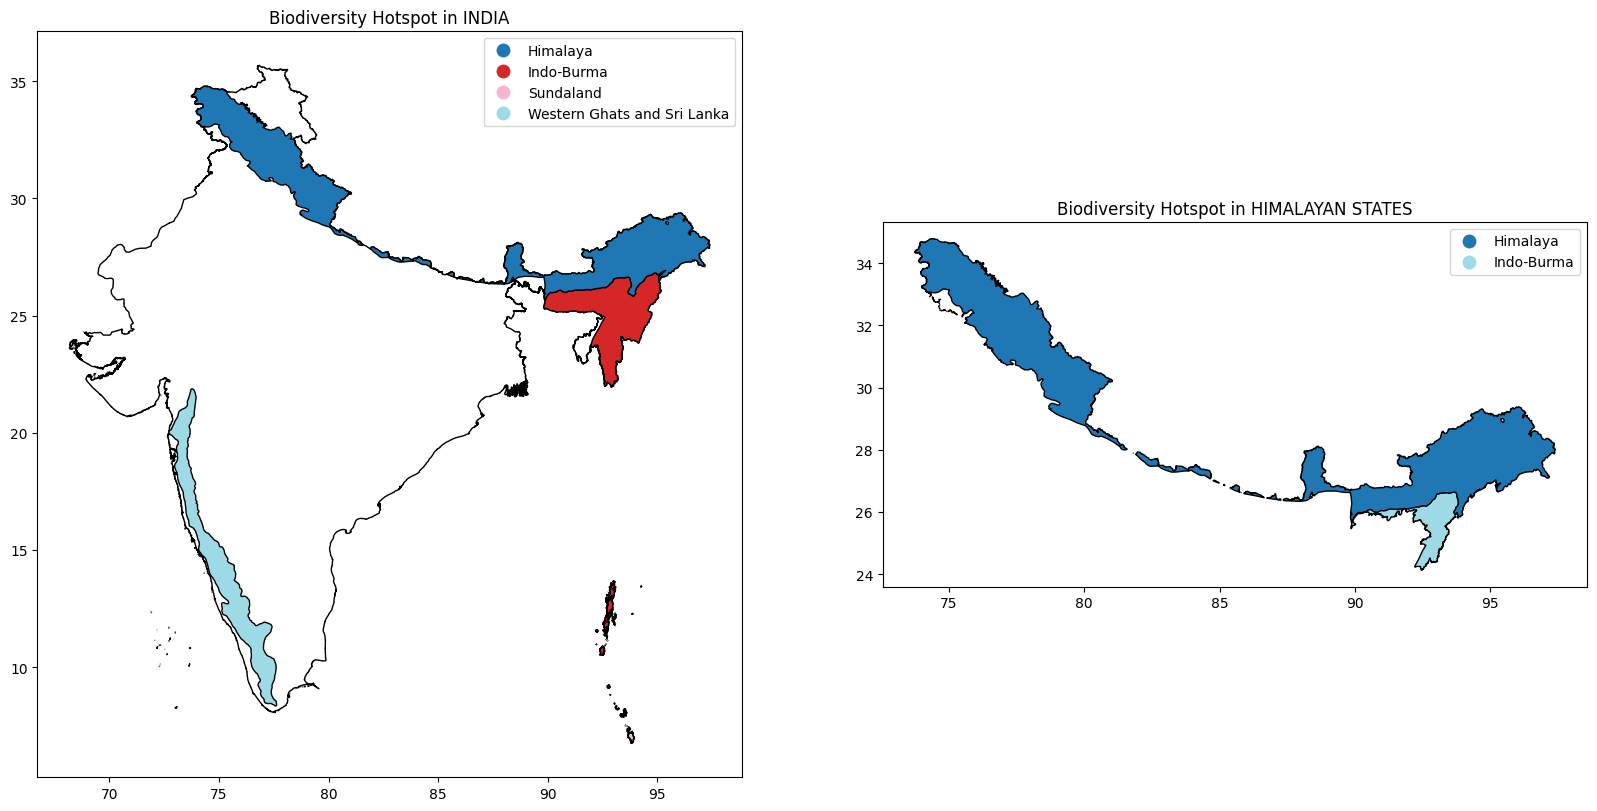

In [177]:

#Plotting the biodiversity map of India
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 15))
ax1.set_title('Biodiversity Hotspot in INDIA')
ax2.set_title('Biodiversity Hotspot in HIMALAYAN STATES')
plot_boundary(ind_df, ax1)
plot_feature(ind_bio_df, ax1, "name")
plot_feature(himalaya_bio_df, ax2, "name")
plt.show()




## 4. Global Ecological Zones

In [ ]:
## Loading the global ecological zones data
ind_GEZ = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level2 by Country/IND/IND_AL2_India_GEZ.json")
ind_GEZ= gpd.read_file(ind_GEZ)
ind_GEZ

In [35]:
# Checking the shape of global ecological zones datasets
ind_GEZ.shape

(9, 8)

In [36]:
# List of global ecological zones
print(ind_GEZ["gez_name"])

0    Subtropical mountain system
1             Subtropical steppe
2      Temperate mountain system
3                Tropical desert
4            Tropical dry forest
5          Tropical moist forest
6       Tropical mountain system
7            Tropical rainforest
8             Tropical shrubland
Name: gez_name, dtype: object


In [102]:
# Loading the global ecological zones data for the all the Himalayan States

hima_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Himachal Pradesh_GEZ.json")
hima_gez_df= gpd.read_file(hima_gez_df)

aruna_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Arunachal Pradesh_GEZ.json")
aruna_gez_df= gpd.read_file(aruna_gez_df)

JK_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Jammu and Kashmir_GEZ.json")
JK_gez_df = gpd.read_file(JK_gez_df )

uttra_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Uttarakhand_GEZ.json")
uttra_gez_df = gpd.read_file(uttra_gez_df)

sikkim_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Sikkim_GEZ.json")
sikkim_gez_df = gpd.read_file(sikkim_gez_df)

assam_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Assam_GEZ.json")
assam_gez_df = gpd.read_file(assam_gez_df)

bihar_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Bihar_GEZ.json")
bihar_gez_df = gpd.read_file(bihar_gez_df)

west_beng_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_West Bengal_GEZ.json")
west_beng_gez_df = gpd.read_file(west_beng_gez_df)

UP_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Uttar Pradesh_GEZ.json")
UP_gez_df = gpd.read_file(UP_gez_df)



In [99]:
# Joining all the satewise datasets in to one df
state_gez_dfs = [hima_gez_df, aruna_gez_df, JK_gez_df,uttra_gez_df,sikkim_gez_df,assam_gez_df,UP_gez_df, bihar_gez_df, west_beng_gez_df ]
all_states_gez_df = pd.concat(state_gez_dfs)

In [100]:
#Standardising the column names
ind_GEZ.columns = column_std(ind_GEZ)
ind_gez_df = ind_GEZ[['gez_name', 'geometry']]

#Clipping the dataset to retain data about only India and Himalayan states
all_states_gez_df.columns = column_std(all_states_gez_df)
all_states_gez_df = all_states_gez_df[['gez_name', 'geometry']]


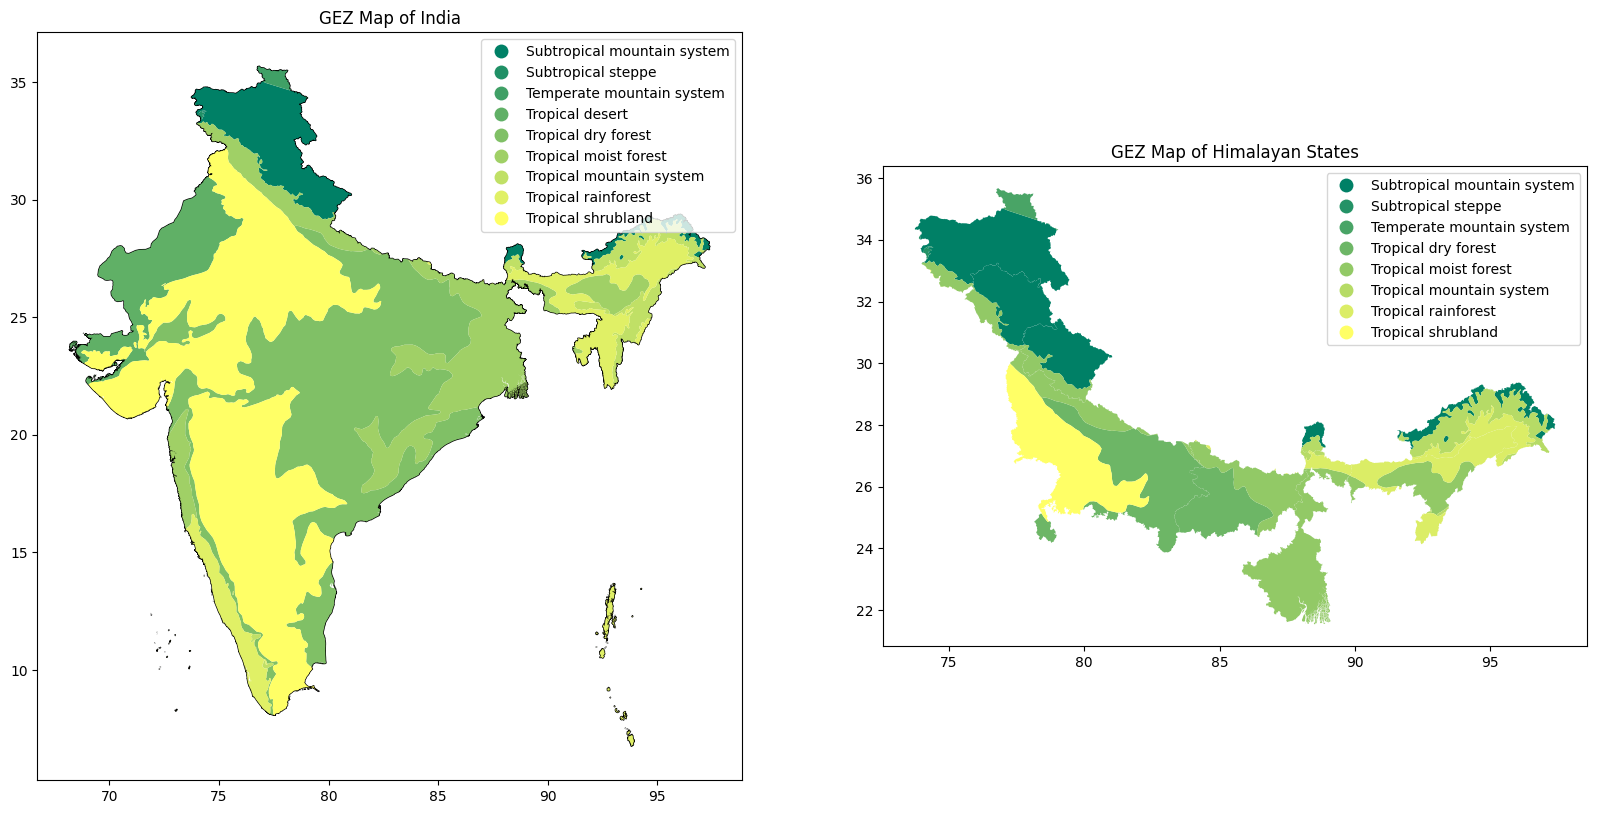

In [101]:
# Plotting the global ecological zones in India and Himalayan States
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15));
plot_boundary(ind_df, ax1)
ind_GEZ.plot(ax=ax1, column='gez_name', cmap = 'summer', legend=True)
all_states_gez_df.plot(ax=ax2, column='gez_name', cmap = 'summer', legend=True)
ax1.set_title("GEZ Map of India")
ax2.set_title("GEZ Map of Himalayan States")
plt.show()

# 5. Soil Resources

In [ ]:
# Loading the Soil Resources data for India
ind_soil_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byCountry/IND_AL2_India_WSR.json")
# Read geojson file into a geodataframe
ind_soil_df = gpd.read_file(ind_soil_df)
ind_soil_df

In [ ]:
# Loading Himalayan states soil data
hima_soil_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byStateWSR/IND/IND_AL4_Himachal Pradesh_WSR.json")
hima_soil_df = gpd.read_file(hima_soil_df)

aruna_soil_df =(r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byStateWSR/IND/IND_AL4_Arunachal Pradesh_WSR.json")
aruna_soil_df = gpd.read_file(aruna_soil_df)

JK_soil_df =(r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byStateWSR/IND/IND_AL4_Jammu and Kashmir_WSR.json")
JK_soil_df = gpd.read_file(JK_soil_df)

uttara_soil_df =(r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byStateWSR/IND/IND_AL4_Uttarakhand_WSR.json")
uttara_soil_df = gpd.read_file(uttara_soil_df)

sikkim_soil_df =(r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byStateWSR/IND/IND_AL4_Sikkim_WSR.json")
sikkim_soil_df = gpd.read_file(sikkim_soil_df)

assam_soil_df =(r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byStateWSR/IND/IND_AL4_Assam_WSR.json")
assam_soil_df  = gpd.read_file(assam_soil_df )

bihar_soil_df =(r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byStateWSR/IND/IND_AL4_Bihar_WSR.json")
bihar_soil_df  = gpd.read_file(bihar_soil_df)

west_beng_soil_df =(r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byStateWSR/IND/IND_AL4_West Bengal_WSR.json")
west_beng_soil_df  = gpd.read_file(west_beng_soil_df)

UP_soil_df =(r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byStateWSR/IND/IND_AL4_Uttar Pradesh_WSR.json")
UP_soil_df  = gpd.read_file(UP_soil_df)



In [84]:
# Combining the himalayan states soil data into one df
state_soil_dfs = [hima_soil_df, aruna_soil_df, JK_soil_df,uttara_soil_df,sikkim_soil_df,assam_soil_df,UP_soil_df, bihar_soil_df, west_beng_soil_df ]
all_states_soil_df = pd.concat(state_soil_dfs)

In [86]:
#Standardising columns
ind_soil_df.columns = column_std(ind_soil_df)
ind_soil_df = ind_soil_df[['ipcc', 'geometry']]

all_states_soil_df.columns = column_std(all_states_soil_df)
all_states_soil_df = all_states_soil_df[['ipcc', 'geometry']]

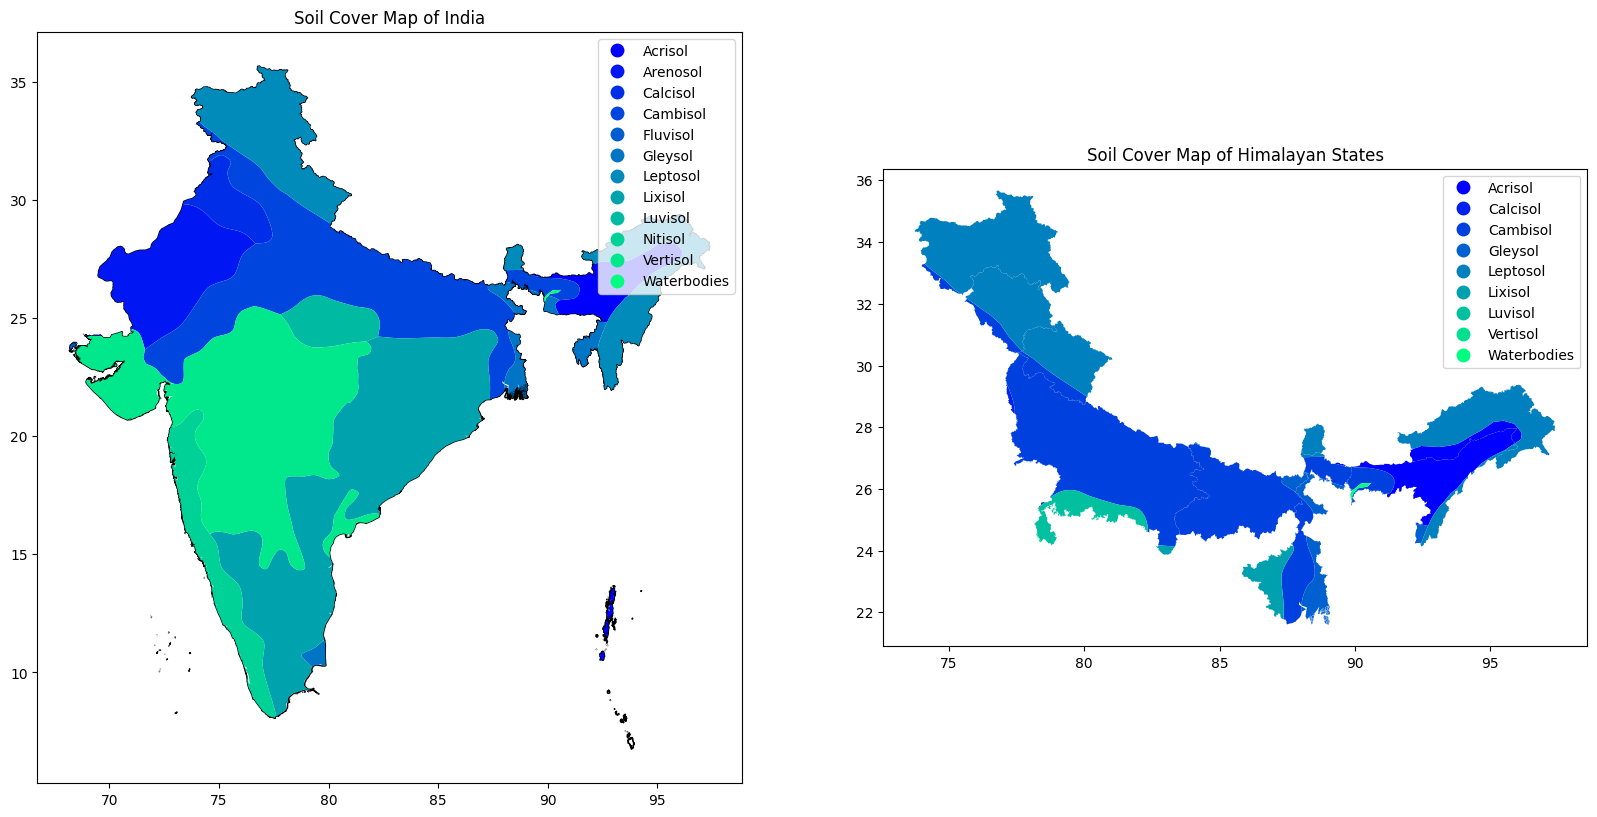

In [88]:
# Plotting the soil cover map of India and Himalayan states

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15));
plot_boundary(ind_df, ax1)
ind_soil_df.plot(ax=ax1, column='ipcc', cmap = 'winter', legend=True)
all_states_soil_df.plot(ax=ax2, column='ipcc', cmap = 'winter', legend=True)
ax1.set_title("Soil Cover Map of India")
ax2.set_title("Soil Cover Map of Himalayan States")
plt.show()